In [1]:
from load_data import load
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, Input, Concatenate, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model

In [3]:
(train_data, train_labels, test_data, test_labels) = load()

In [4]:
net1_kernel_size = 3
net2_kernel_size = 5
net3_kernel_size = 7

conv1_depth = 32
conv2_depth = 64
conv3_depth = 128

net1_input = Input(shape=(32,32,3),name='net1_input')
net2_input = Input(shape=(32,32,3),name='net2_input')
net3_input = Input(shape=(32,32,3),name='net3_input')

net1_conv1_1 = Conv2D(conv1_depth, kernel_size=net1_kernel_size, padding='same', activation='relu')(net1_input)
net1_conv1_2 = Conv2D(conv1_depth, kernel_size=net1_kernel_size, padding='same', activation='relu')(net1_conv1_1)
net1_conv1_3 = Conv2D(conv1_depth, kernel_size=net1_kernel_size, padding='same', activation='relu')(net1_conv1_2)

net2_conv1_1 = Conv2D(conv1_depth, kernel_size=net2_kernel_size, padding='same', activation='relu')(net2_input)
net2_conv1_2 = Conv2D(conv1_depth, kernel_size=net2_kernel_size, padding='same', activation='relu')(net2_conv1_1)
net2_conv1_3 = Conv2D(conv1_depth, kernel_size=net2_kernel_size, padding='same', activation='relu')(net2_conv1_2)

net3_conv1_1 = Conv2D(conv1_depth, kernel_size=net3_kernel_size, padding='same', activation='relu')(net3_input)
net3_conv1_2 = Conv2D(conv1_depth, kernel_size=net3_kernel_size, padding='same', activation='relu')(net3_conv1_1)
net3_conv1_3 = Conv2D(conv1_depth, kernel_size=net3_kernel_size, padding='same', activation='relu')(net3_conv1_2)

net1_norm1 = BatchNormalization()(net1_conv1_3)
net2_norm1 = BatchNormalization()(net2_conv1_3)
net3_norm1 = BatchNormalization()(net3_conv1_3)

net1_maxpool1 = MaxPool2D()(net1_norm1)
net2_maxpool1 = MaxPool2D()(net2_norm1)
net3_maxpool1 = MaxPool2D()(net3_norm1)

net1_conv2_1 = Conv2D(conv2_depth, kernel_size=net1_kernel_size, padding='same', activation='relu')(net1_maxpool1)
net1_conv2_2 = Conv2D(conv2_depth, kernel_size=net1_kernel_size, padding='same', activation='relu')(net1_conv2_1)
net1_conv2_3 = Conv2D(conv2_depth, kernel_size=net1_kernel_size, padding='same', activation='relu')(net1_conv2_2)

net2_conv2_1 = Conv2D(conv2_depth, kernel_size=net2_kernel_size, padding='same', activation='relu')(net2_maxpool1)
net2_conv2_2 = Conv2D(conv2_depth, kernel_size=net2_kernel_size, padding='same', activation='relu')(net2_conv2_1)
net2_conv2_3 = Conv2D(conv2_depth, kernel_size=net2_kernel_size, padding='same', activation='relu')(net2_conv2_2)

net3_conv2_1 = Conv2D(conv2_depth, kernel_size=net3_kernel_size, padding='same', activation='relu')(net3_maxpool1)
net3_conv2_2 = Conv2D(conv2_depth, kernel_size=net3_kernel_size, padding='same', activation='relu')(net3_conv2_1)
net3_conv2_3 = Conv2D(conv2_depth, kernel_size=net3_kernel_size, padding='same', activation='relu')(net3_conv2_2)

net1_norm2 = BatchNormalization()(net1_conv2_3)
net2_norm2 = BatchNormalization()(net2_conv2_3)
net3_norm2 = BatchNormalization()(net3_conv2_3)

net1_maxpool2 = MaxPool2D()(net1_norm2)
net2_maxpool2 = MaxPool2D()(net2_norm2)
net3_maxpool2 = MaxPool2D()(net3_norm2)

net1_conv3_1 = Conv2D(conv3_depth, kernel_size=net1_kernel_size, padding='same', activation='relu')(net1_maxpool2)
net1_conv3_2 = Conv2D(conv3_depth, kernel_size=net1_kernel_size, padding='same', activation='relu')(net1_conv3_1)
net1_conv3_3 = Conv2D(conv3_depth, kernel_size=net1_kernel_size, padding='same', activation='relu')(net1_conv3_2)

net2_conv3_1 = Conv2D(conv3_depth, kernel_size=net2_kernel_size, padding='same', activation='relu')(net2_maxpool2)
net2_conv3_2 = Conv2D(conv3_depth, kernel_size=net2_kernel_size, padding='same', activation='relu')(net2_conv3_1)
net2_conv3_3 = Conv2D(conv3_depth, kernel_size=net2_kernel_size, padding='same', activation='relu')(net2_conv3_2)

net3_conv3_1 = Conv2D(conv3_depth, kernel_size=net3_kernel_size, padding='same', activation='relu')(net3_maxpool2)
net3_conv3_2 = Conv2D(conv3_depth, kernel_size=net3_kernel_size, padding='same', activation='relu')(net3_conv3_1)
net3_conv3_3 = Conv2D(conv3_depth, kernel_size=net3_kernel_size, padding='same', activation='relu')(net3_conv3_2)

net1_norm3 = BatchNormalization()(net1_conv3_3)
net2_norm3 = BatchNormalization()(net2_conv3_3)
net3_norm3 = BatchNormalization()(net3_conv3_3)

net1_maxpool3 = MaxPool2D()(net1_norm3)
net2_maxpool3 = MaxPool2D()(net2_norm3)
net3_maxpool3 = MaxPool2D()(net3_norm3)

net1_flattened = Flatten()(net1_maxpool3)
net2_flattened = Flatten()(net2_maxpool3)
net3_flattened = Flatten()(net3_maxpool3)

nets_merged = Concatenate()([net1_flattened, net2_flattened, net3_flattened])

fc_1 = Dense(4096, activation='relu')(nets_merged)
fc_2 = Dense(4096, activation='relu')(fc_1)
output = Dense(10, activation='softmax')(fc_2)

model = Model(inputs=[net1_input, net2_input, net3_input], outputs=[output])

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
net1_input (InputLayer)         [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
net2_input (InputLayer)         [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
net3_input (InputLayer)         [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 32)   896         net1_input[0][0]                 
______________________________________________________________________________________________

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
es_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
sm_cb = tf.keras.callbacks.ModelCheckpoint(monitor='val_loss', filepath='../models/aggregated_dilations_weights.hdf5', verbose=1, save_best_only=True)
history = model.fit([train_data, train_data, train_data], train_labels, epochs=40, verbose=2, validation_split=0.2, shuffle=True, callbacks=[es_cb, sm_cb])

Train on 40000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: val_loss improved from inf to 1.56204, saving model to ../models/aggregated_dilations_weights.hdf5
40000/40000 - 62s - loss: 1.6824 - accuracy: 0.4198 - val_loss: 1.5620 - val_accuracy: 0.4842
Epoch 2/40

Epoch 00002: val_loss improved from 1.56204 to 1.08933, saving model to ../models/aggregated_dilations_weights.hdf5
40000/40000 - 59s - loss: 1.0925 - accuracy: 0.6111 - val_loss: 1.0893 - val_accuracy: 0.6120
Epoch 3/40

Epoch 00003: val_loss improved from 1.08933 to 1.06015, saving model to ../models/aggregated_dilations_weights.hdf5
40000/40000 - 59s - loss: 0.8710 - accuracy: 0.6941 - val_loss: 1.0601 - val_accuracy: 0.6420
Epoch 4/40

Epoch 00004: val_loss improved from 1.06015 to 0.89214, saving model to ../models/aggregated_dilations_weights.hdf5
40000/40000 - 59s - loss: 0.7461 - accuracy: 0.7400 - val_loss: 0.8921 - val_accuracy: 0.7081
Epoch 5/40

Epoch 00005: val_loss improved from 0.89214 to 0.75725

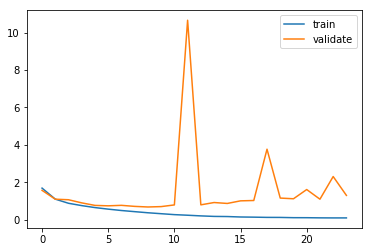

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validate'], loc='upper right')

Text(0, 0.5, 'Loss (Categorical Cross Entropy)')

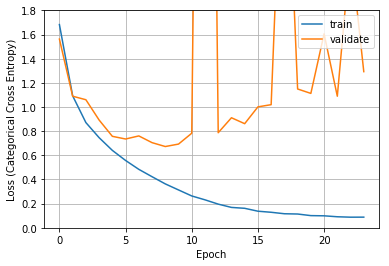

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validate'], loc='upper right')
plt.ylim(0, 1.8)
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss (Categorical Cross Entropy)')

In [10]:
test_labels = np.array(test_labels, dtype='uint8')
model.load_weights('../models/aggregated_dilations_weights.hdf5')
model.evaluate([test_data,test_data,test_data], test_labels, verbose=0)

[0.6956379708766938, 0.7861]